In [1]:
import kagglehub
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\RAFAEL\OneDrive\Documentos\Gabriel\mqam\data-analysis-mqam\mqam_libs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import shutil
# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
origem = "C:\\Users\\RAFAEL\\.cache\\kagglehub\\datasets\\johnsmith88\\heart-disease-dataset\\versions\\2\\heart.csv"
destino = "heart.csv"

shutil.move(origem, destino)
print("Path to dataset files:", destino)
data = pd.read_csv(destino)


Path to dataset files: heart.csv


In [253]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [254]:
list(data.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [256]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [257]:
#Verificando se os valores nulos fazem sentido ou se causam distorções que vão prejudicar a análise
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [258]:
# Substitua "newname1", "newname2", ... pelos nomes desejados para cada coluna
data.columns = [
    "idade",  # age
    "sexo",  # sex
    "tipo_dor_peito",  # cp
    "pressao_sanguinea",  # trestbps
    "colesterol_total",  # chol
    "diabetes",  # fbs
    "eletro_result",  # restecg
    "max_bpm",  # thalach
    "dp_exercicio",  # exang
    "ST_depressao_extest", # oldpeak
    "inclinação_ST_ex", # slope
    "n_vc", # ca
    "result", # thal
    "target"  # target
]

In [259]:


# Colunas para análise
colunas_excluir = ['sexo', 'diabetes', 'eletro_result', 'target', 'tipo_dor_peito', 'result', 'dp_exercicio']
colunas_analise = [col for col in data.columns if col not in colunas_excluir]

# Lista para armazenar os resultados
resultados = []

for col in colunas_analise:
    media = data[col].mean()
    mediana = data[col].median()
    moda = data[col].mode()[0]
    variancia = data[col].var()
    desvio_padrao = data[col].std()
    coef_var = desvio_padrao / media if media != 0 else None
    q1 = data[col].quantile(0.25)
    q2 = data[col].quantile(0.5)
    q3 = data[col].quantile(0.75)
    resultados.append({
        'variavel': col,
        'media': media,
        'mediana': mediana,
        'moda': moda,
        'variancia': variancia,
        'desvio_padrao': desvio_padrao,
        'coeficiente_variacao': coef_var,
        'quartil_1': q1,
        'quartil_2': q2,
        'quartil_3': q3
    })

# Criando DataFrame e salvando em CSV
df_resultados = pd.DataFrame(resultados)
# df_resultados.to_csv('variaveis_quantitativas.csv', index=False)
print(df_resultados)

              variavel       media  mediana   moda    variancia  \
0                idade   54.434146     56.0   58.0    82.306450   
1    pressao_sanguinea  131.611707    130.0  120.0   306.835410   
2     colesterol_total  246.000000    240.0  204.0  2661.787109   
3              max_bpm  149.114146    152.0  162.0   529.263325   
4  ST_depressao_extest    1.071512      0.8    0.0     1.380750   
5     inclinação_ST_ex    1.385366      1.0    1.0     0.381622   
6                 n_vc    0.754146      0.0    0.0     1.062544   

   desvio_padrao  coeficiente_variacao  quartil_1  quartil_2  quartil_3  
0       9.072290              0.166665       48.0       56.0       61.0  
1      17.516718              0.133094      120.0      130.0      140.0  
2      51.592510              0.209726      211.0      240.0      275.0  
3      23.005724              0.154283      132.0      152.0      166.0  
4       1.175053              1.096631        0.0        0.8        1.8  
5       0.617755   

In [ ]:

# Selecionando variáveis categóricas
colunas_categoricas =['sexo', 'diabetes', 'eletro_result', 'target', 'tipo_dor_peito', 'result', 'dp_exercicio']
#Dicionario de legendas
leg_sexo = {0: 'Feminino', 1: 'Masculino'}
leg_tipo_dor_peito = {0: 'Assintomático', 1: 'Em esforço intenso ou prolongado ', 2: 'Em esforço moderado', 3: 'Em esforço leve'}
leg_diabetes = {0: 'Não', 1: 'Sim'}
leg_target = {0: 'Sem Doença', 1: 'Com Doença'}
leg_eletroresult = {0: 'Normal', 1: 'Alterações da onda ST-T', 2: 'Hipertrofia ventricular esquerda'}
leg_result = {0: 'Normal', 1: 'Normal', 2: 'Anomalia Corrigida', 3: 'Anomalia Reversível'}
leg_dp_exercicio = {0: 'Não', 1: 'Sim'}

mapeamentos = {
    'sexo': leg_sexo,
    'tipo_dor_peito': leg_tipo_dor_peito,
    'diabetes': leg_diabetes,
    'target': leg_target,
    'eletro_result': leg_eletroresult,
    'result': leg_result,
    'dp_exercicio': leg_dp_exercicio
}

for col in colunas_categoricas:
    print(f"Tabela de frequências para: {col}")
    
    valores = data[col]
    if col in mapeamentos:
        valores = valores.map(mapeamentos[col])
    freq_abs = valores.value_counts()
    freq_rel = valores.value_counts(normalize=True)
    moda = valores.mode()[0]
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa': freq_rel
    })
    print(tabela)
    print("\n")
    print(f"Moda: {moda}")
    print("\n")

#

Tabela de frequências para: sexo
           Frequência Absoluta  Frequência Relativa
sexo                                               
Masculino                  713              0.69561
Feminino                   312              0.30439


Moda: Masculino


Tabela de frequências para: diabetes
          Frequência Absoluta  Frequência Relativa
diabetes                                          
Não                       872             0.850732
Sim                       153             0.149268


Moda: Não


Tabela de frequências para: eletro_result
                                  Frequência Absoluta  Frequência Relativa
eletro_result                                                             
Alterações da onda ST-T                           513             0.500488
Normal                                            497             0.484878
Hipertrofia ventricular esquerda                   15             0.014634


Moda: Alterações da onda ST-T


Tabela de frequências para: targe

In [ ]:
with open('analise_descritiva.csv', 'w', encoding='utf-8') as f:
    # Quantitativas
    f.write('Variáveis Quantitativas\n')
    df_resultados.to_csv(f, index=False)
    f.write('\n\nVariáveis Qualitativas/Categóricas\n')
    # Qualitativas
    for col in colunas_categoricas:
        valores = data[col]
        if col in mapeamentos:
            valores = valores.map(mapeamentos[col])
        freq_abs = valores.value_counts()
        freq_rel = valores.value_counts(normalize=True)
        moda = valores.mode()[0]
        tabela = pd.DataFrame({
            'Categoria': freq_abs.index,
            'Frequência Absoluta': freq_abs.values,
            'Frequência Relativa': freq_rel.values
        })
        f.write(f'\n{col}\n')
        tabela.to_csv(f, index=False)
        f.write(f'Moda: {moda}\n')

In [262]:
# Testar leitura do arquivo CSV
with open('analise_descritiva.csv', encoding='utf-8') as f:
    conteudo = f.read()
    print("Início do arquivo CSV:")
    print(conteudo[:1000])  # Mostra os primeiros 1000 caracteres

    # Visualizar seções
    print("\nSeção 'Variáveis Quantitativas':")
    inicio_quant = conteudo.find('Variáveis Quantitativas')
    fim_quant = conteudo.find('Variáveis Qualitativas')
    print(conteudo[inicio_quant:fim_quant])

    print("\nSeção 'Variáveis Qualitativas':")
    print(conteudo[fim_quant:fim_quant+2000])  # Mostra os primeiros 1000 caracteres da seção qualitativa



Início do arquivo CSV:
Variáveis Quantitativas
variavel,media,mediana,moda,variancia,desvio_padrao,coeficiente_variacao,quartil_1,quartil_2,quartil_3

idade,54.43414634146342,56.0,58.0,82.3064500762195,9.072290233244278,0.16666542681378949,48.0,56.0,61.0

pressao_sanguinea,131.61170731707318,130.0,120.0,306.835409679878,17.516718005376408,0.13309391970104828,120.0,130.0,140.0

colesterol_total,246.0,240.0,204.0,2661.787109375,51.59251020618206,0.20972565124464254,211.0,240.0,275.0

max_bpm,149.11414634146342,152.0,162.0,529.2633250762195,23.005723745977207,0.15428263723077842,132.0,152.0,166.0

ST_depressao_extest,1.0715121951219515,0.8,0.0,1.3807501524390244,1.175053255150176,1.0966307807784121,0.0,0.8,1.8

inclinação_ST_ex,1.3853658536585365,1.0,1.0,0.3816215701219513,0.6177552671745918,0.44591489355912445,1.0,1.0,2.0

n_vc,0.7541463414634146,0.0,0.0,1.0625438262195124,1.0307976650242823,1.3668403708277999,0.0,0.0,1.0



Variáveis Qualitativas

sexo
Categoria,Frequência Absoluta,Freq

In [263]:
from scipy.stats import kstest, norm

# Teste de Kolmogorov-Smirnov para normalidade
for col in colunas_analise:
    # Normalizando os dados da coluna
    col_data = data[col].dropna()
    col_mean = col_data.mean()
    col_std = col_data.std()
    # Testando contra a distribuição normal com mesma média e desvio padrão
    stat, p = kstest(col_data, 'norm', args=(col_mean, col_std))
    print(f"{col}: p-valor={p}")
    if p > 0.05:
        print("Distribuição provavelmente normal")
    else:
        print("Distribuição provavelmente não normal")

idade: p-valor=4.215945671584439e-06
Distribuição provavelmente não normal
pressao_sanguinea: p-valor=3.6545092303436445e-10
Distribuição provavelmente não normal
colesterol_total: p-valor=0.002858943098599819
Distribuição provavelmente não normal
max_bpm: p-valor=0.00012493630006773655
Distribuição provavelmente não normal
ST_depressao_extest: p-valor=7.925010979605249e-30
Distribuição provavelmente não normal
inclinação_ST_ex: p-valor=5.078163869522893e-81
Distribuição provavelmente não normal
n_vc: p-valor=5.260837272401904e-101
Distribuição provavelmente não normal


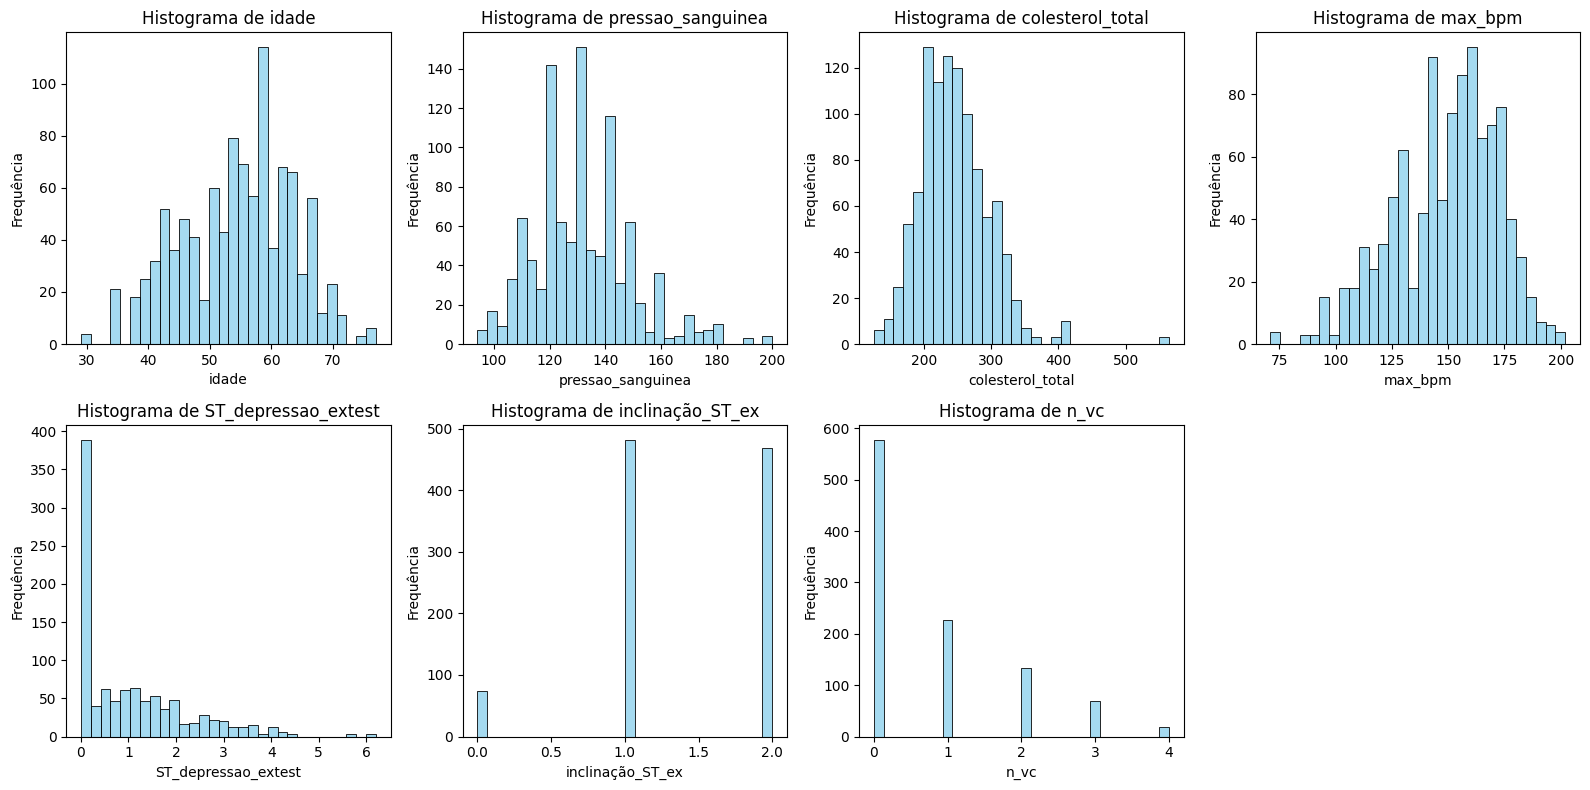

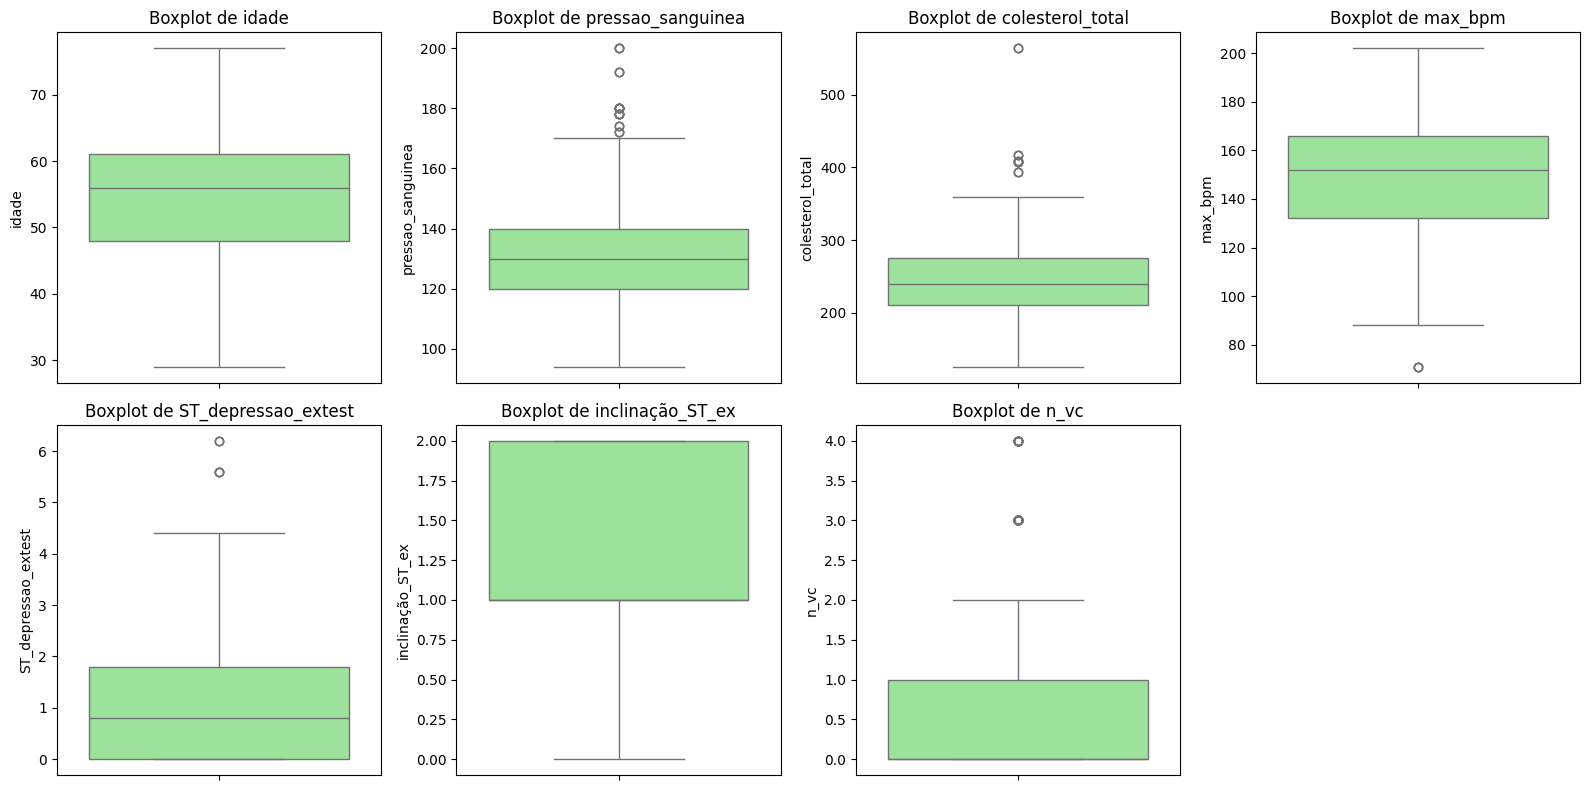

In [264]:

fig, axes = plt.subplots(nrows=2, ncols=(len(colunas_analise)+1)//2, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(colunas_analise):
    sns.histplot(data[col], bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Boxplots organizados em uma grade
fig, axes = plt.subplots(nrows=2, ncols=(len(colunas_analise)+1)//2, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(colunas_analise):
    sns.boxplot(y=data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

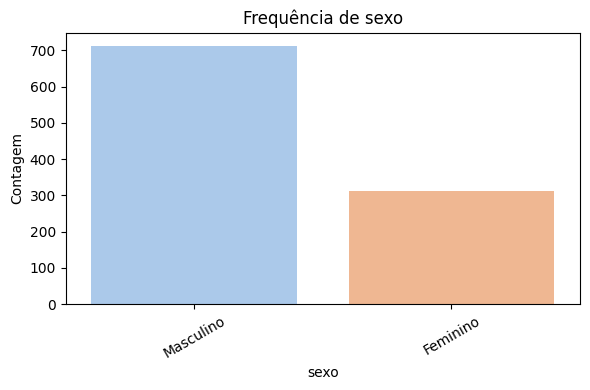

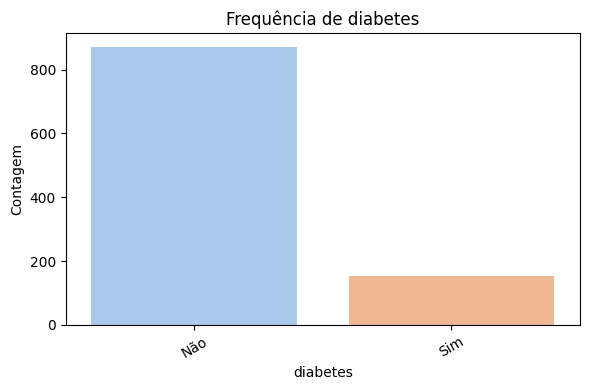

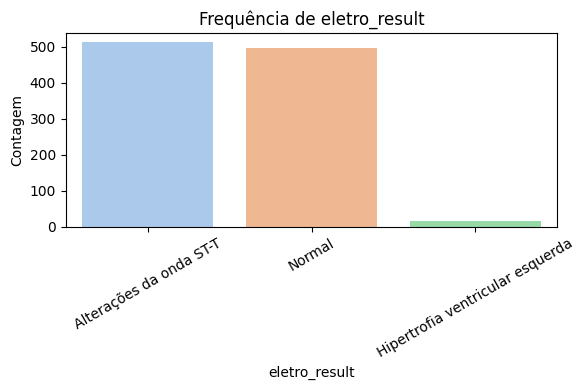

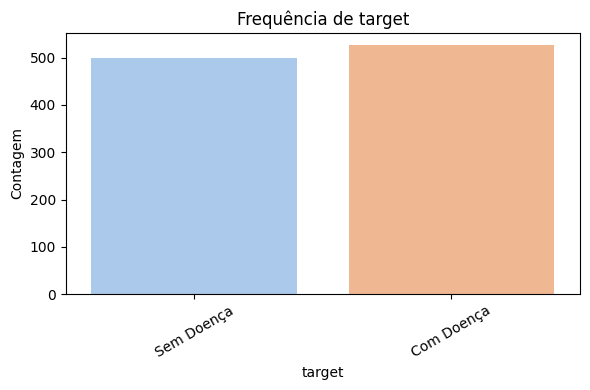

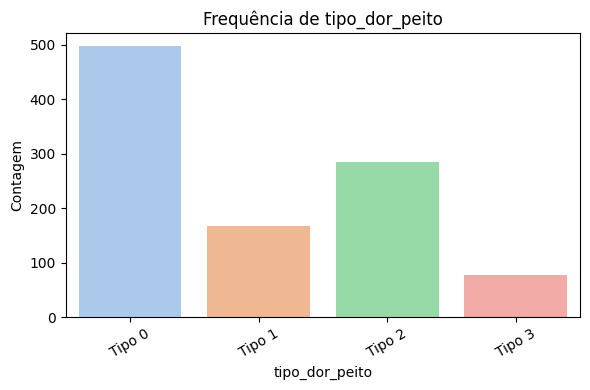

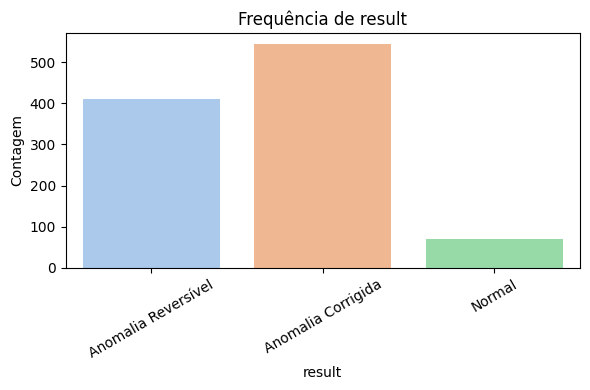

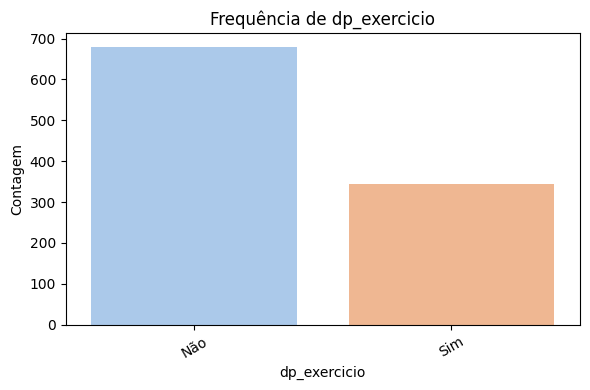

In [265]:

for col in colunas_categoricas:
    plt.figure(figsize=(6,4))
    if col in mapeamentos:
        data[col] = data[col].map(mapeamentos[col])
        sns.countplot(x=data[col], hue=data[col], legend=False, palette='pastel')
        plt.xlabel(col)
        plt.xticks(rotation=30)
    else:
        sns.countplot(x=data[col], hue=data[col], legend=False, palette='pastel')
        plt.xlabel(col)
    plt.title(f'Frequência de {col}')
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()